# In-Class Exercises
The goal of this Jupyter Notebook and the in-class exercises is to give you practical experience applying basic signal processing and signal comparison approaches, which are widely used in ubiquitous computing and important to completing assignment 2 (A2: Gesture Recognizer)

# FFT
A Fast Fourier Transform (FFT) samples a signal and extracts the frequency components. It is used to transform a signal from the time-domain to the frequency-domain.
![Time vs. Frequency view of signal](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png "View of a signal in the time and frequency domain") 

For example, the signal below consists of a sum of cosine waves at 10, 20, 30, 40, and 50 Hz.
![FFT of an example signal](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/FFT_of_Cosine_Summation_Function.png/800px-FFT_of_Cosine_Summation_Function.png)


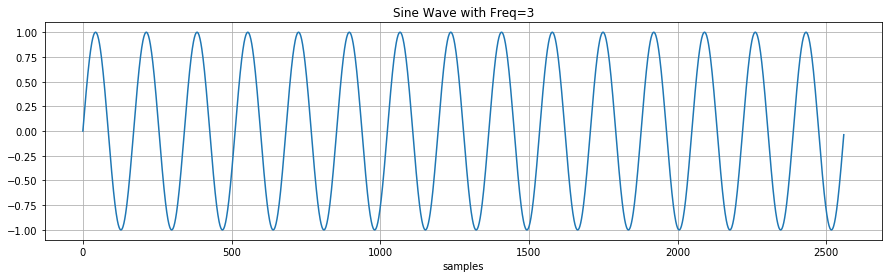

In [13]:
# Let's play with the FFT analysis in scipy and frequency-domain plotting in matplotlib!
# First, let's make a simple signal to play with.

import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/

totalTimeOfSignalInSecs = 5
freq = 3 # in Hz
samplingRate = 512

# Create an array from 0 to totalTimeOfSignalInSecs * samplingRate 
# But we need to divide each value in this array by our samplingRate so that our time step (dt) is correct
# We use arange here rather than just range because arange is numpy's version of Python's built-in range... 
# so we create a numpy array rather than a regular Python array
time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal = np.sin(2 * np.pi * freq * time)

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(signal)
ax.set(xlabel='samples', title='Sine Wave with Freq={}'.format(freq))
ax.grid()

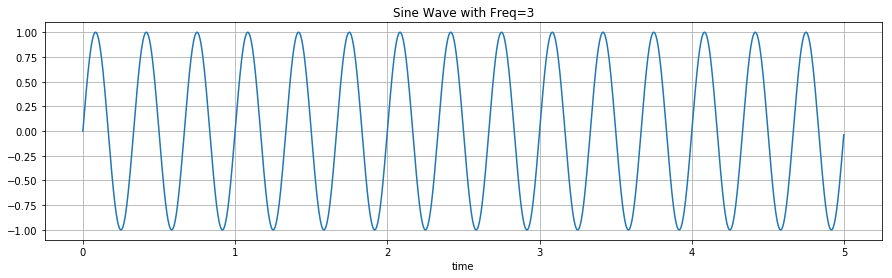

In [14]:
# Let's do the same thing but provide the plot with both x and y values (so the x-axis is time rather than samples)
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(time, signal)
ax.set(xlabel='time', title='Sine Wave with Freq={}'.format(freq))
ax.grid()

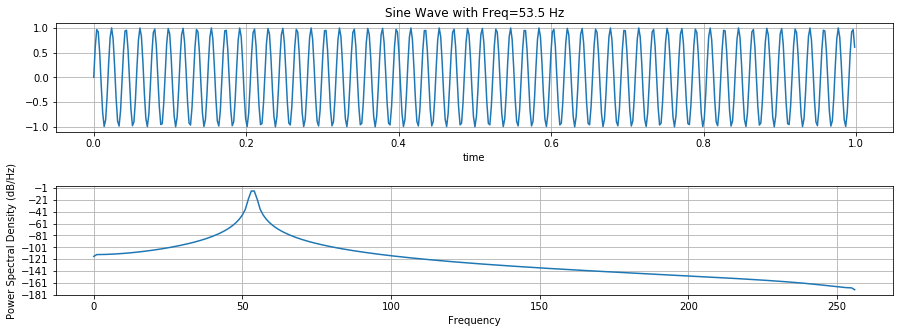

In [15]:


# Now, let's analyze the frequencies in our wave form using spectral analysis
freq = 53.5 # Hz

time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal = np.sin(2 * np.pi * freq * time) 

# signal = np.sin(2 * np.pi * freq * time) + 0.05 * np.sin(2 * np.pi * 2 * freq * time) + 0.005 * np.sin(2 * np.pi * 3 * freq * time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

ax1.plot(time[0:samplingRate], signal[0:samplingRate])
ax1.set(xlabel='time', title='Sine Wave with Freq={} Hz'.format(freq))
ax1.grid()

# By reducing the NFFT size, we get less precision in our signal analysis. 
powerSpectrum, powerFreq = ax2.psd(signal, NFFT=512, Fs=samplingRate)

[Text(0.5,1,'Spectral Analysis Across Entire Signal')]

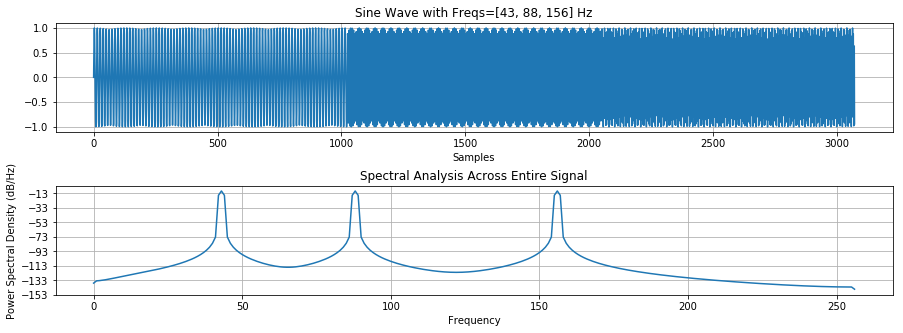

In [16]:
# But what if frequency changes during the signal. Let's add three different frequencies that occur at discrete
# time points.
timeOfEachSignalInSecs = 2
freqs = [43, 88, 156]

time = np.arange(timeOfEachSignalInSecs * samplingRate) / samplingRate
signal1 = np.sin(2 * np.pi * freqs[0] * time) 
signal2 = np.sin(2 * np.pi * freqs[1] * time) 
signal3 = np.sin(2 * np.pi * freqs[2] * time) 

# You can use numpy's concatenate to concatenate the signals together
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
signalConcatenated = np.concatenate((signal1, signal2, signal3))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

ax1.plot(signalConcatenated)
ax1.set(xlabel='Samples', title='Sine Wave with Freqs={} Hz'.format(freqs))
ax1.grid()

# By reducing the NFFT size, we get less precision in our signal analysis. 
powerSpectrum, powerFreq = ax2.psd(signalConcatenated, NFFT=512, Fs=samplingRate)
ax2.set(title="Spectral Analysis Across Entire Signal")

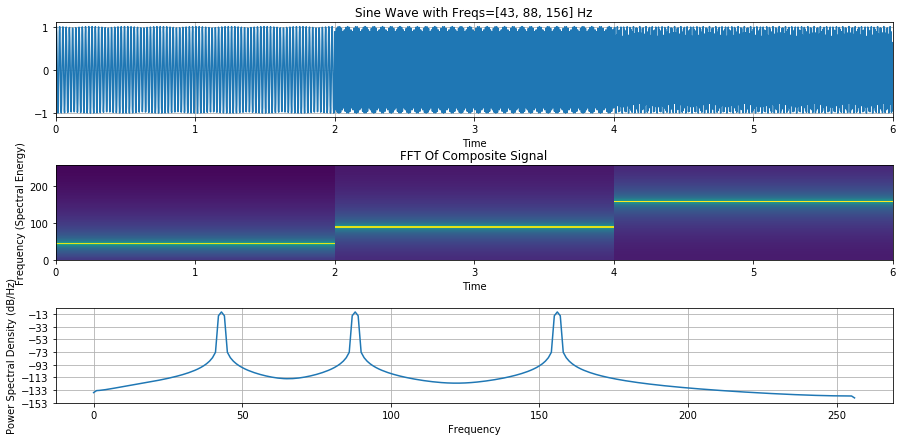

In [17]:
# But the above doesn't show us how the frequencies change over time. For this, we have to use a spectrogram
numSignals = len(freqs)
time = np.arange(timeOfEachSignalInSecs * samplingRate * numSignals) / samplingRate
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,7))
fig.subplots_adjust(hspace=0.5)

ax1.plot(time, signalConcatenated)
ax1.set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
ax1.set_xlim(xmin=0,xmax=timeOfEachSignalInSecs*numSignals)
ax1.grid()

# NFFT = # of points from sample used to calculate the FFT.
# noverlap = # of overlapping points between NFFT windows
ax2.specgram(signalConcatenated, NFFT=512, Fs=samplingRate, noverlap=0)
ax2.set(xlabel='Time', ylabel="Frequency (Spectral Energy)", title='FFT Of Composite Signal')

powerSpectrum, powerFreq = ax3.psd(signalConcatenated, NFFT=512, Fs=samplingRate)

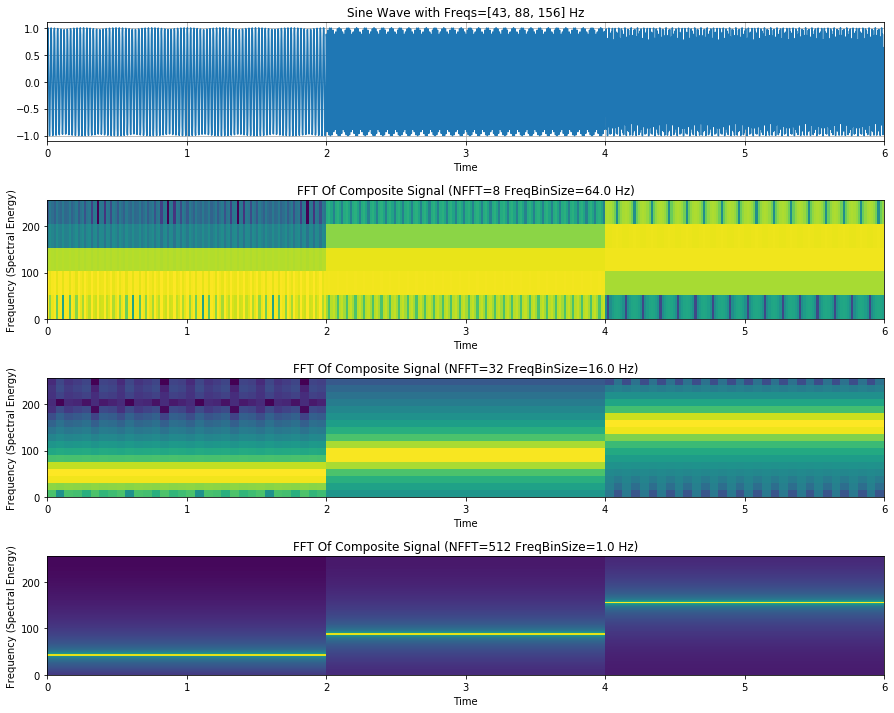

In [18]:
# Playing around with FFT resolution
# By increasing the FFT window size, you increase frequency resolution
# However, the drawback is that you might miss spurious signals that pop-up momentarily but
# not have enough energy compared to other signals to show up in your frequency analysis
numSignals = len(freqs)
time = np.arange(timeOfEachSignalInSecs * samplingRate * numSignals) / samplingRate
fig, axes = plt.subplots(4, 1, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

axes[0].plot(time, signalConcatenated)
axes[0].set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
axes[0].set_xlim(xmin=0,xmax=timeOfEachSignalInSecs*numSignals)
axes[0].grid()

# NFFT = # of points from sample used to calculate the FFT. Must be greater than 1/2 sampling rate
# noverlap = # of overlapping points between NFFT windows

# You can calculate your frequency resolution (that is the size of each frequency bin)
# by FreqResolution = SamplingRate / FFTWindowSize
fftWindowSize = 8
axes[1].specgram(signalConcatenated, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
            title='FFT Of Composite Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

fftWindowSize = 32
axes[2].specgram(signalConcatenated, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[2].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
            title='FFT Of Composite Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

fftWindowSize = 512
axes[3].specgram(signalConcatenated, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[3].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
            title='FFT Of Composite Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

print()

[Text(0.5,1,'Spectral Analysis Across Entire Signal')]

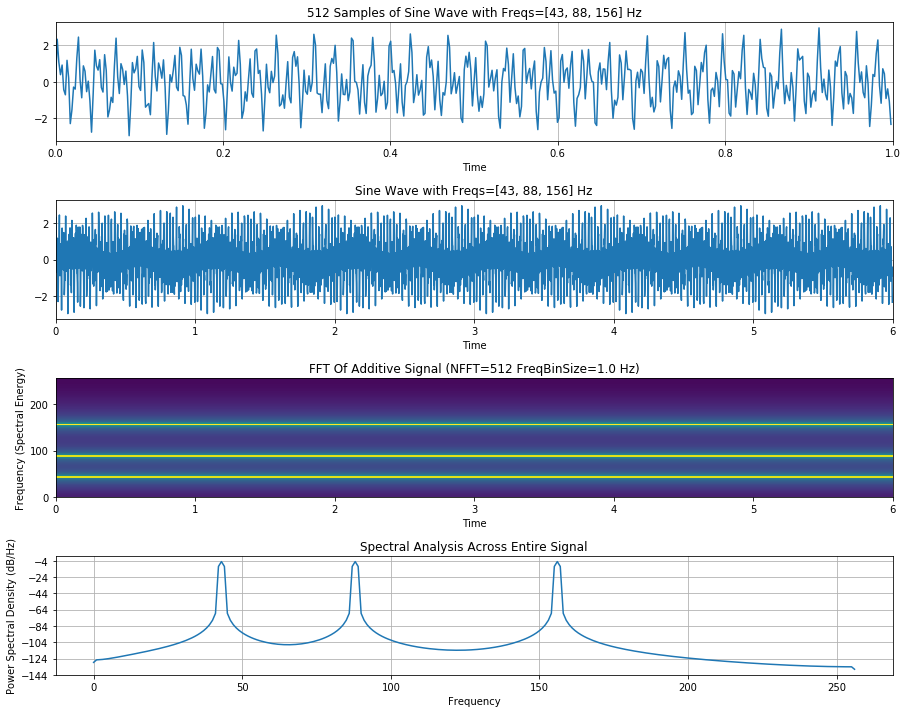

In [19]:
# Recall from last lecture about additive synthesis. What if instead of having the three signals occur at different times, 
# they all occurred simultaneously!
totalTimeOfSignalInSecs = timeOfEachSignalInSecs * len(freqs)
time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal1 = np.sin(2 * np.pi * freqs[0] * time) 
signal2 = np.sin(2 * np.pi * freqs[1] * time) 
signal3 = np.sin(2 * np.pi * freqs[2] * time) 
signalAdditive = signal1 + signal2 + signal3

fig, axes = plt.subplots(4, 1, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

zoomedInSamplingWindow = int(samplingRate / 1)
axes[0].plot(time[0:zoomedInSamplingWindow], signalAdditive[0:zoomedInSamplingWindow])
axes[0].set(xlabel='Time', title='{} Samples of Sine Wave with Freqs={} Hz'.format(zoomedInSamplingWindow, freqs))
axes[0].set_xlim(xmin=0,xmax=zoomedInSamplingWindow/samplingRate)
axes[0].grid()

axes[1].plot(time, signalAdditive)
axes[1].set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
axes[1].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[1].grid()

# NFFT = # of points from sample used to calculate the FFT. Must be greater than 1/2 sampling rate
# noverlap = # of overlapping points between NFFT windows
fftWindowSize = 512
axes[2].specgram(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[2].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT Of Additive Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

powerSpectrum, powerFreq = axes[3].psd(signalAdditive, NFFT=512, Fs=samplingRate)
axes[3].set(title="Spectral Analysis Across Entire Signal")

# Filtering
Filtering involves convolving one signal (the filter signal) with another (your source signal). Perhaps the most common digital filter for motion analysis is the Butterworth filter, which Mladenov et al., 2009 used in their paper to filter out high frequency noise in their step tracker.

Using a digital filter is a two-step process:
1. You first create the digital filter with desired characteristics (cutoff frequency, phase shift, etc.)
2. You then apply this filter through convolution to your source signal

Expert Note (feel free to ignore): while you might not conceptualize a moving average filter like this, it can actually be thought of as a type of convolution. See http://matlabtricks.com/post-11/moving-average-by-convolution. Indeed, to apply a moving average filter with numpy, you simply do the following:
'''
windowSize = 10
netMagWithMeanFilter5 = np.convolve(sourceSignal, np.ones((windowSize,))/windowSize, mode='valid')
'''

Frequencies that are in our signal=[43, 88, 156]. We are trying to create a low-pass filter that filters out all freqs greater than 115



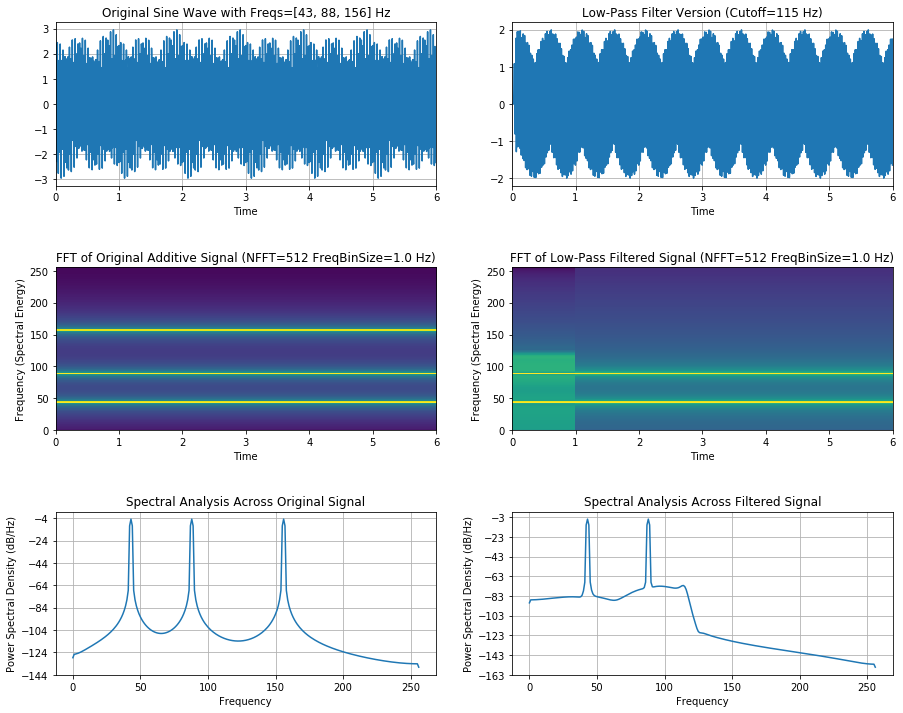

In [20]:
# What happens if we try a low-pass filter. Low-pass filters filter out high frequencies from our data and
# keep the lower frequencies. A common digital filter is the butterworth filter, which the Mladenov et al., 2009 
# paper used to filter out high frequency noise in their step tracker (a moving average filter is another
# example of a low-pass filter as it removes high-frequency noise)
# Resources:
# - http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
# - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
from scipy.signal import butter, lfilter

# Create the filter
desiredCutOffFreq = 115

print("Frequencies that are in our signal={}. We are trying to create a low-pass filter that filters out all freqs greater than {}"
      .format(freqs, desiredCutOffFreq))

# The butterworth filter expects the cutoff frequency to be normalized between [0, Nyquist]
nyquistFreq = samplingRate / 2.0
desiredCutOffFreqNormalized = desiredCutOffFreq / nyquistFreq

# Ideally, with an infinite "filter order", you would get a perfect filter
# that cuts off all frequencies within your desired band. In practice, you
# are dealing with finite data and so a super high filter order will distort your signal
# Generally, filter orders can be relatively small (on the order of 10s or less like 6 or 9) but play around!
# http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
filterOrder = 40
b, a = butter(filterOrder, desiredCutOffFreqNormalized, btype='lowpass')

# Use lfilter to apply the filter: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.lfilter.html
signalButterLowPass = lfilter(b, a, signalAdditive)

fig, axes = plt.subplots(3, 2, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

axes[0][0].plot(time, signalAdditive)
axes[0][0].set(xlabel='Time', title='Original Sine Wave with Freqs={} Hz'.format(freqs))
axes[0][0].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][0].grid()

axes[0][1].plot(time, signalButterLowPass)
axes[0][1].set(xlabel='Time', title='Low-Pass Filter Version (Cutoff={} Hz)'.format(desiredCutOffFreq))
axes[0][1].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][1].grid()

fftWindowSize = 512
axes[1][0].specgram(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][0].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of Original Additive Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

axes[1][1].specgram(signalButterLowPass, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of Low-Pass Filtered Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

powerSpectrum, powerFreq = axes[2][0].psd(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][0].set(title="Spectral Analysis Across Original Signal")

powerSpectrum, powerFreq = axes[2][1].psd(signalButterLowPass, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][1].set(title="Spectral Analysis Across Filtered Signal")

print()

Frequencies that are in our signal=[43, 88, 156]. We are trying to create a high-pass filter that filters out all freqs less than 125



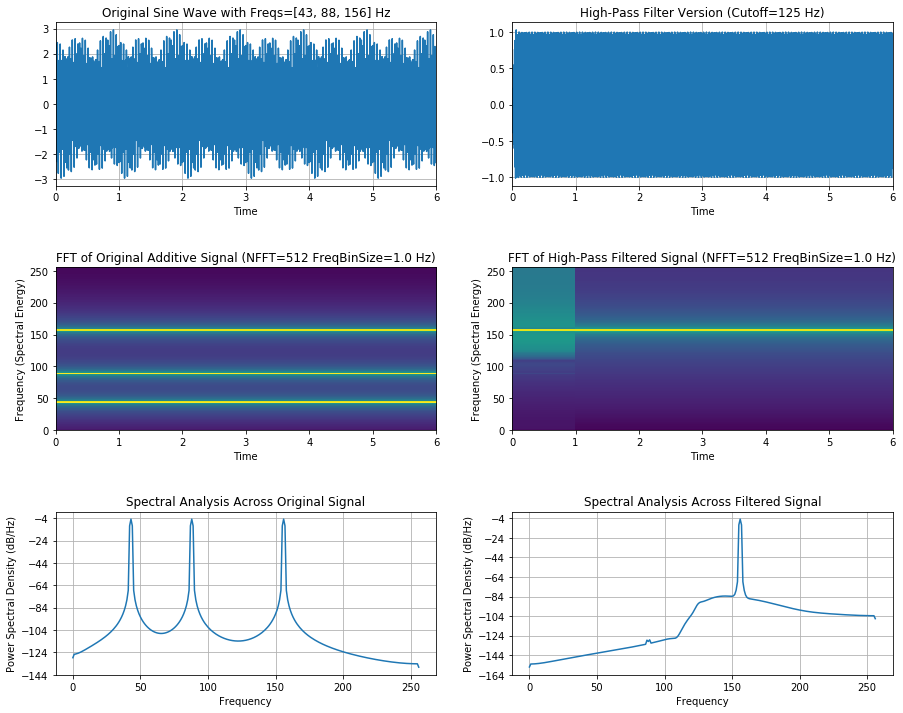

In [21]:
# Now let's create a high-pass filter
desiredCutOffFreq = 125

print("Frequencies that are in our signal={}. We are trying to create a high-pass filter that filters out all freqs less than {}"
      .format(freqs, desiredCutOffFreq))

# The butterworth filter expects the cutoff frequency to be normalized between [0, Nyquist]
nyquistFreq = samplingRate / 2.0
desiredCutOffFreqNormalized = desiredCutOffFreq / nyquistFreq

# Ideally, with an infinite "filter order", you would get a perfect filter
# that cuts off all frequencies within your desired band. In practice, you
# are dealing with finite data and so a super high filter order will distort your signal
# Generally, filter orders can be relatively small (on the order of 10s or less like 6 or 9) but play around!
# http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
filterOrder = 30
b, a = butter(filterOrder, desiredCutOffFreqNormalized, btype='highpass')

# Use lfilter to apply the filter: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.lfilter.html
signalButterHighPass = lfilter(b, a, signalAdditive)

fig, axes = plt.subplots(3, 2, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

axes[0][0].plot(time, signalAdditive)
axes[0][0].set(xlabel='Time', title='Original Sine Wave with Freqs={} Hz'.format(freqs))
axes[0][0].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][0].grid()

axes[0][1].plot(time, signalButterHighPass)
axes[0][1].set(xlabel='Time', title='High-Pass Filter Version (Cutoff={} Hz)'.format(desiredCutOffFreq))
axes[0][1].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][1].grid()

fftWindowSize = 512
axes[1][0].specgram(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][0].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of Original Additive Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

axes[1][1].specgram(signalButterHighPass, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of High-Pass Filtered Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

powerSpectrum, powerFreq = axes[2][0].psd(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][0].set(title="Spectral Analysis Across Original Signal")

powerSpectrum, powerFreq = axes[2][1].psd(signalButterHighPass, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][1].set(title="Spectral Analysis Across Filtered Signal")

print()

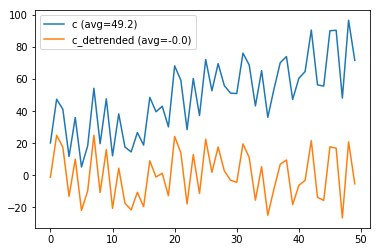

In [22]:
# Recall that another pre-processing step in addition to filtering is de-meaning or de-trending our data
# Let's play around with that
from scipy import signal
a = np.random.rand(50) * 50
b = np.array(range(0,50))
c = a + b

# scipy has a nice detrending function
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html
c_detrended = signal.detrend(c)

fig, axes = plt.subplots()
axes.plot(c, label="c (avg={:0.1f})".format(np.mean(c)))

axes.plot(c_detrended, label="c_detrended (avg={:0.1f})".format(np.mean(c_detrended)))
axes.legend()

# Signal comparisons
One of the most basic signal comparison approaches is just to take the Euclidean distance between two signals. A slightly better approach is to first attempt to align those signals to minimize the distance.

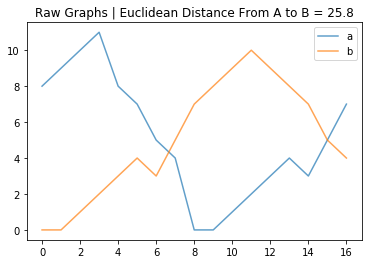

In [23]:
# Use Euclidean distance to compare two signals
from scipy import signal
from scipy.spatial import distance

a = [8, 9, 10, 11, 8, 7, 5, 4, 0, 0, 1, 2, 3, 4, 3, 5, 7]
b = [0, 0, 1, 2, 3, 4, 3, 5, 7, 8, 9, 10, 9, 8, 7, 5, 4]

euclidDistanceAToB = distance.euclidean(a, b)

fig, axes = plt.subplots()

axes.plot(a, alpha=0.7, label="a")
axes.plot(b, alpha=0.7, label="b")
axes.legend()
axes.set_title("Raw Graphs | Euclidean Distance From A to B = {:0.1f}".format(euclidDistanceAToB))
print()

Best correlation point=8, euclidean distance a to b=25.768197453450252, euclidean distance a_shifted to b=2.0



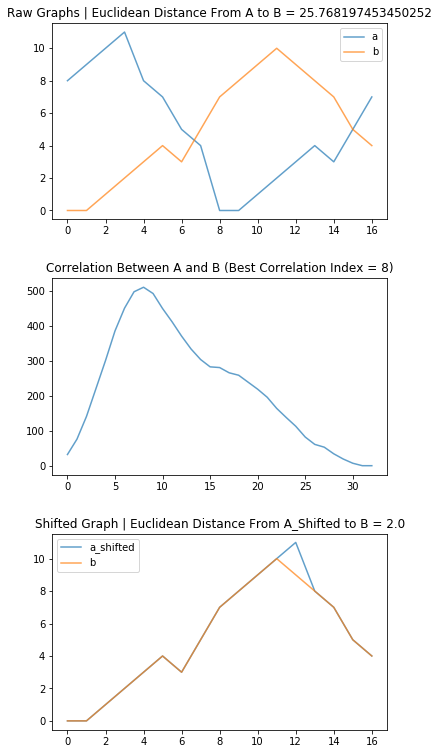

In [25]:
# Now let's use correlation to align the signals before comparison
correlateAToB = signal.correlate(a,b)
bestCorrelationPoint = np.argmax(correlateAToB)
indexShift = len(a) - np.argmax(correlateAToB)
a_shifted = np.roll(a, indexShift)

euclidDistanceAToB = distance.euclidean(a, b)
euclidDistanceAShiftedToB = distance.euclidean(a_shifted, b)
print("Best correlation point={}, euclidean distance a to b={}, euclidean distance a_shifted to b={}"
      .format(bestCorrelationPoint, euclidDistanceAToB, euclidDistanceAShiftedToB))

fig, axes = plt.subplots(3, figsize=(6, 13))
fig.subplots_adjust(hspace=0.3)

axes[0].plot(a, alpha=0.7, label="a")
axes[0].plot(b, alpha=0.7, label="b")
axes[0].legend()
axes[0].set_title("Raw Graphs | Euclidean Distance From A to B = {}".format(euclidDistanceAToB))

# Note that the correlation signal is the length of a + b but that's because
# of how correlation works: it slides the two signals across each other to compute the correlation
axes[1].plot(correlateAToB, alpha=0.7)
axes[1].set_title("Correlation Between A and B (Best Correlation Index = {})".format(bestCorrelationPoint))

axes[2].plot(a_shifted, alpha=0.7, label="a_shifted")
axes[2].plot(b, alpha=0.7, label="b")
axes[2].legend()
axes[2].set_title("Shifted Graph | Euclidean Distance From A_Shifted to B = {}".format(euclidDistanceAShiftedToB))
print()

# Closing note
If you want the plots to be interactive, type the following in a cell:
```
%matplotlib notebook 
```
See: https://stackoverflow.com/a/41125787